# Projekt Zdjęcie Panoramiczne
przedmiot: Algebra Liniowa

pracownia specjalistyczna 9

członkowie zespołu:
- Jan Hapunik - 120316
- Izabela Rybińska - uzupełnij:3

## 1. wprowadzenie teoretyczne oraz opis wykorzystanego aparatu matematycznego

Zadanie polega na stworzeniu programu będącego w stanie połaczyć przynajmniej dwa zdjęcia wykonane z tego samego miejsca, opisujące różne przestrzenie (ale z istniejącymi punktami wspólnymi) w jedno zdjęcie panoramiczne przy użyciu metod z algebry liniowej. 

### **Aby to osiągnąć potrzebujemy:**

- dwa zdjęcia, z zaznaczonymi punktami wspólnymi;
- kod umożliwiający przekształcenie zdjęć na osi trzech współrzędnych tak, by zaznaczone punkty się na siebie nakładały. Trzecia współrzędna jest używana jako waga, pozwalająca skalować obraz, więc tak naprawdę poruszamy się po osi dwóch głównych współrzędnych i jednej pomocnej;
- przycięcie końcowego zdjęcia do odpowiednich rozmiarów;

### **Część teoretyczna:**

**Narzędzia matematyczne, z których będziemy korzystać:**

- **współrzędne jednorodne**

Punkt na obrazie wejściowo opisujemy jako:
$$ p = (x, y, w)^T $$
Niewiadome te reprezentują punkt kartezjański:
$$ (\frac{x}{w}, \frac{y}{w}) $$
Wartość w (na wejściu równa 1) pełni rolę współczynnika skali, dlatego różne trójki jednorodne mogą opisywać ten sam punkt w przestrzeni euklidesowej.
Zastosowanie współrzędnych jednorodnych pozwala zapisać przekształcenia perspektywiczne (homografie) oraz przesunięcia (translacje) w postaci liniowej jako mnożenie przez macierz liniową 3 x 3, co nie byłoby możliwe w klasycznym układzie kartezjańskim.

- **homografia**

Homografia to przekształcenia rzutowe, opisują relację pomiedzy dwoma płaskimi obrazami tej samej sceny widzianej z różnych perspektyw. Za pomocą macierzy homografii jesteśmy w stanie przekształcić punkty z jednego układu współrzędnych (z jednego ze zdjęć) do drugiego.

Macierz homografii H ma wymiar 3 x 3 i wygląda następująco:

$$
H = \begin{bmatrix}
h_{11} & h_{12} & h_{13} \\
h_{21} & h_{22} & h_{23} \\
h_{31} & h_{32} & h_{33}
\end{bmatrix}
$$

Relacja pomiędzy punktem źródłowym a punktem docelowym wynosi:

$$ p_{dst} \sim H * p_{src} $$

gdzie $\sim$ oznacza równość z dokładnością do skali.

Parametry macierzy homografii można rozpisać następująco:
$$ (x', y') = \left( \frac{h_{11}x + h_{12}y + h_{13}}{h_{31}x + h_{32}y + 1}, \frac{h_{21}x + h_{22}y + h_{23}}{h_{31}x + h_{32}y + 1} \right) $$

przyjmujemy tutaj $$ h_{33} = 1 $$ aby pozbyć się niejednoznaczności skali.

Końcowo, oznacza to, że aby uzyskać macierz homografii potrzeba minimum 4 par punktów wspólnych.


- **metoda najmniejszych kwadratów**

Na samym początku określając koordynaty punktów wspólnych pomiędzy dwoma obrazami wyznaczyliśmy ich o wiele więcej niż 4 pary. Gdybyśmy wzięli je wszystkie pod uwagę układ równań byłby nadokreślony. Do wyboru 4 par punktów wspólnych, które dałyby nam najlepsze wyniki korzystamy z metody najmniejszych kwadratów. 

Szukamy w niej takiego wektora parametrów x (współczynników homografii), który minimalizuje normę błędu
$$ min || Ax - b ||^2 $$

Rozwiązaniem tego problemu jest układ równań normalnych
$$A^T A x = A^T b \implies x = (A^T A)^{-1} A^T b$$


## 2. wprowadzenie techniczne zawierające opis bibliotek oraz sposób rozwiązania zagadnienia:

- **PIL (Pillow)** - pozwala na otworzenie i przygotowanie zdjęć wejściowych do dalszego przetwarzania, a również na transformację istniejących obrazów za pomocą metody .transform();
- **MatPlotLib** - pozwala na wyświetlanie obrazów z zaznaczonymi punktami, prezentację wyników po przekształceniach;
- **Numpy** - pozwala na obliczenia macierzy;

### proces: 
1. ręczne wyznaczenie par koordynatów
2. obliczenie macierzy homografii
3. normalizacja przestrzeni
4. blending
5. automatyczne przycinanie


## 3. rozwiązania poszczególnych zadań projektowych;

### 1. Wgranie zdjęć i klasyfikacja punktów

In [43]:
# importowanie bibliotek
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [60]:
# otworzenie zdjęć
img_left = Image.open("./images/1.jpg")
img_right = Image.open("./images/2.jpg")

# skalowanie zdjęć do szerokości 1000px, gwarantuje to szybsze działanie i mniejsze zużycie pamięci
org_width, org_height = img_left.size
scale = 1000 / org_width
new_size = (int(org_width * scale), int(org_height * scale))
img_left = img_left.resize(new_size, Image.ANTIALIAS)
img_right = img_right.resize(new_size, Image.ANTIALIAS)

In [ ]:
# opisanie punktów wspólnych
img_left_coordinates = np.array([(2339, 399), (2992, 606), (2358, 827), (2837, 805),
(3894, 565), (3079, 992), (3907, 1421), (2561, 1540), (3699, 2382), (2997, 2648),
(3681, 2855), (3843, 2867), (2024, 1516), (2041, 936), (3888, 164)])

img_right_coordinates = np.array([(814, 307), (1550, 665), (873, 786), (1380, 834),
(2229, 748), (1526, 1038), (2235, 1470), (965, 1574), (2076, 2304), (1420, 2679),
(2061, 2723), (2188, 2708), (227, 1545), (262, 839), (2228, 411)])

# skalowanie współrzędnych punktów
img_left_coordinates = img_left_coordinates * scale
img_right_coordinates = img_right_coordinates * scale

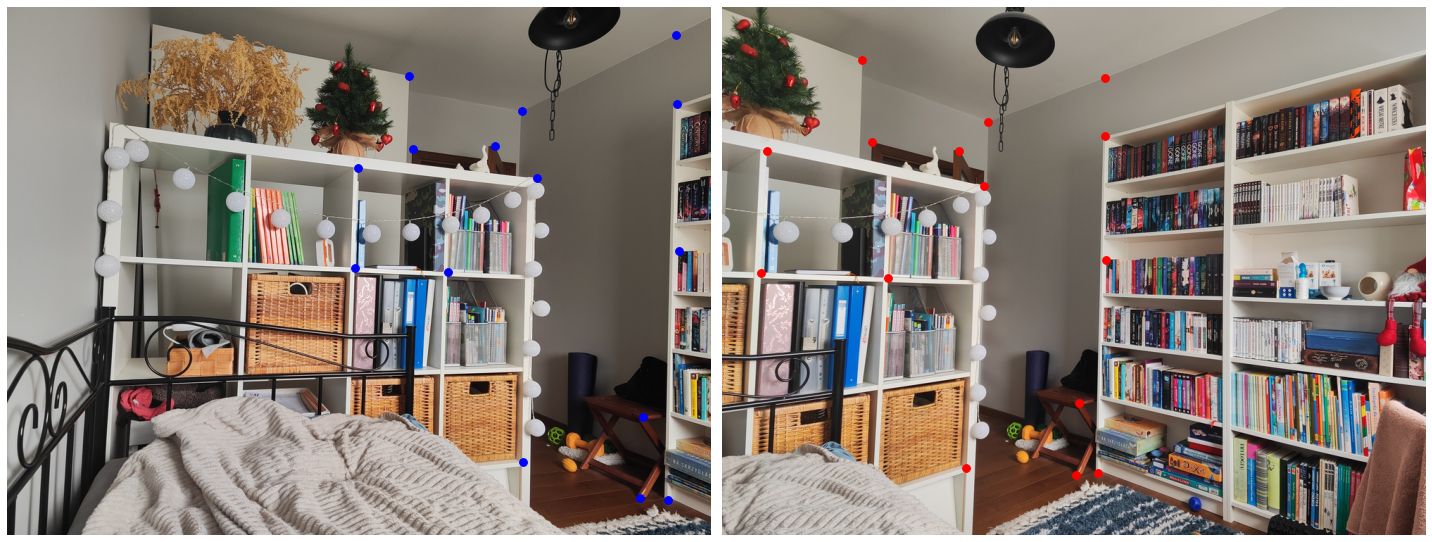

In [66]:
fig, (left, right) = plt.subplots(1, 2, figsize=(20, 10))

left.imshow(img_left)
left.scatter(img_left_coordinates[:, 0], img_left_coordinates[:, 1], 
            c='blue', s=60)
left.axis('off')

right.imshow(img_right)
right.scatter(img_right_coordinates[:, 0], img_right_coordinates[:, 1], 
            c='red', s=60)
right.axis('off')

plt.tight_layout()
plt.show()

### 2. Konstrukcja zdjęcia panoramicznego
#### (a) Wyznaczenie homografii

In [67]:
# kod z pliku: zdjęcie panoramiczne - notatki

def find_coefficients(source_coords, target_coords):
    tmp = []
    for src, tgt in zip(source_coords, target_coords):
        tmp.append([tgt[0],  tgt[1], 1,      0,             0, 0, -src[0]*tgt[0], -src[0]*tgt[1]])
        tmp.append([0,            0, 0, tgt[0],        tgt[1], 1, -src[1]*tgt[0], -src[1]*tgt[1]])
    a = np.matrix(tmp, dtype=float)
    b = np.array(source_coords).reshape(len(source_coords)*2)
    res = np.dot(np.linalg.inv(a.T * a) * a.T, b)
    return np.array(res).reshape(8)

coefficients to parametry homografii w kierunku: obraz źródłowy → obraz docelowy, są tutaj obliczane metodą najmniejszych kwadratów przy pomocy poniższej linijki kodu:

`res = np.dot(np.linalg.inv(a.T * a) * a.T, b)`

In [92]:
coefficients = find_coefficients(img_right_coordinates, img_left_coordinates)

Złożenie macierzy homografii:

In [93]:
homography_matrix = np.array([
    [coefficients[0], coefficients[1], coefficients[2]],
    [coefficients[3], coefficients[4], coefficients[5]],
    [coefficients[6], coefficients[7], 1.0],], dtype=float)
homography_matrix = np.linalg.inv(homography_matrix)

#### (b) Przygotowanie przestrzeni roboczej

Przy standardowej homografii istnieje możliwość, że punkty będą się znajdować w przestrzeni ujemnej, by tego uniknąć obliczamy nowe granice obrazu i stosujemy macierz translacji.

In [94]:
w1, h1 = (img_right).size
w2, h2 = (img_left).size

corners_left = np.array([[0, 0, 1], [w2, 0, 1], [w2, h2, 1], [0, h2, 1]]).T

# przemnożenie homografii przez rogi lewego obrazu 
corners_trans_left = (homography_matrix @ corners_left)
# normalizacja współrzędnych
corners_trans_left = corners_trans_left / corners_trans_left[2]

# zebranie wszystkich współrzędnych x i y
all_x = np.concatenate((corners_trans_left[0], [0, w1]))
all_y = np.concatenate((corners_trans_left[1], [0, h1]))

# obliczenie przesunięcia
shift_x = -np.min(all_x)
shift_y = -np.min(all_y)

# obliczenie rozmiaru nowego obrazu
new_w = int(np.ceil(np.max(all_x) - np.min(all_x)))
new_h = int(np.ceil(np.max(all_y) - np.min(all_y)))

Złożenie macierzy translacji:

In [95]:
translation_matrix = np.array([
    [1, 0, shift_x], 
    [0, 1, shift_y], 
    [0, 0, 1]
], dtype=float)

In [96]:
# obliczenie końcowej macierzy transformacji
final_matrix = translation_matrix @ homography_matrix
# odwrócenie macierzy i normalizacja do formatu przyjaznego dla PIL
final_matrix_inv = np.linalg.inv(final_matrix)
PIL_friendly_matrix = final_matrix_inv / final_matrix_inv[2, 2]

In [97]:
PIL_coeffs = PIL_friendly_matrix.flatten()[:8]

#### (c) Rozrysowanie na układzie współrzędnych.

In [101]:
# tworzymy pusta warstwe i wklejamy obraz panoramy

layer1 = Image.new("RGBA", (new_w, new_h), (0, 0, 0, 0))
layer1.paste(img_left.convert("RGBA"), (int(shift_x), int(shift_y)))

layer2 = img_right.transform((new_w, new_h), Image.PERSPECTIVE, PIL_coeffs, Image.BICUBIC).convert("RGBA")

In [102]:
arr1_u8 = np.array(layer1, dtype=np.uint8)  # (H,W,4)
arr2_u8 = np.array(layer2, dtype=np.uint8)

a1 = arr1_u8[:, :, 3] > 0
a2 = arr2_u8[:, :, 3] > 0
overlap = a1 & a2

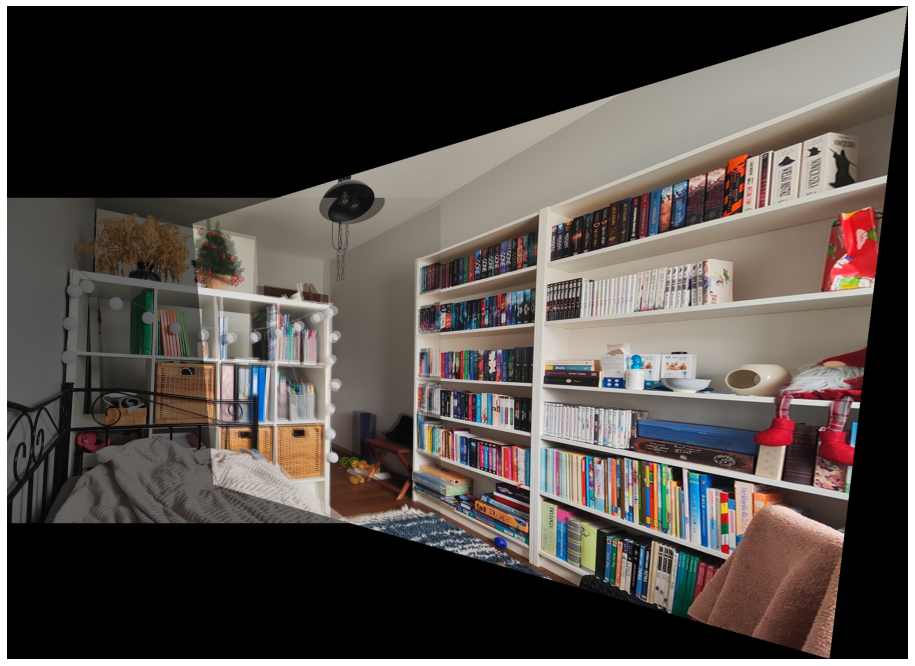

In [ ]:
out = np.zeros_like(arr1_u8, dtype=np.uint8)

m = a1 & (~overlap)
out[m] = arr1_u8[m]

m = a2 & (~overlap)
out[m] = arr2_u8[m]

if np.any(overlap):
    rgb1 = arr1_u8[:, :, :3].astype(np.uint16)
    rgb2 = arr2_u8[:, :, :3].astype(np.uint16)
    avg = ((rgb1 + rgb2) >> 1).astype(np.uint8)   # (a+b)//2
    out[overlap, :3] = avg[overlap]
    out[overlap, 3] = 255

panorama_check = Image.fromarray(out, mode="RGBA")

plt.figure(figsize=(18, 12))
plt.imshow(panorama_check)
plt.axis('off')
plt.show()

>>> KROK 3: Przycinanie (wzorcowe) — RAM-friendly...
Użyty zakres Y: 444:1190 (Wysokość paska: 746)
Znaleziono krawędzie -> Góra: 2023, Dół: 1934
Finalne cięcie X: 1935


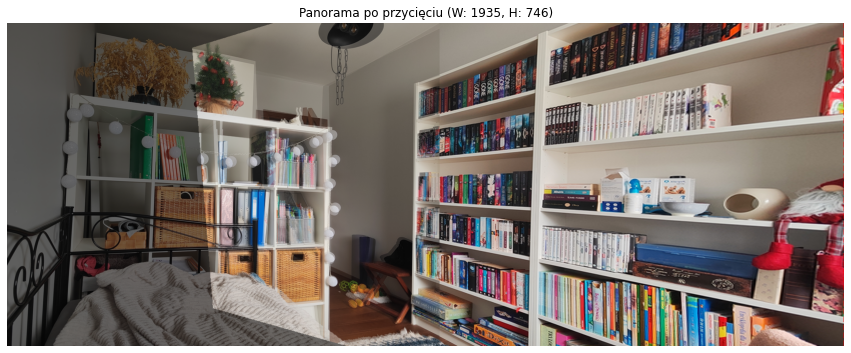

In [ ]:
arr1_u8 = np.array(layer1, dtype=np.uint8)  # (H,W,4)
arr2_u8 = np.array(layer2, dtype=np.uint8)

# arr1_u8, arr2_u8: uint8 RGBA z komórki 13
h_full, w_full, _ = arr1_u8.shape

# Y-range jak we wzorcu (z bezpiecznikami)
y_s_calc = int(shift_y) + 2
y_e_calc = int(shift_y + h1) - 2

if y_s_calc >= h_full or y_e_calc <= 0 or y_s_calc < 0:
    print(f"! OSTRZEŻENIE: shift_y ({shift_y}) poza zakresem. Ustawiam start na 0.")
    y_start = 2
    y_end = min(h_full, int(h1) - 2)
else:
    y_start = y_s_calc
    y_end = min(h_full, y_e_calc)

if y_end <= y_start:
    print("! BŁĄD ZAKRESU: y_end <= y_start. Reset do pełnej wysokości.")
    y_start = 0
    y_end = h_full

print(f"Użyty zakres Y: {y_start}:{y_end} (Wysokość paska: {y_end - y_start})")

# Detekcja tła (odpowiednik brightness<0.06 na float)
# float: sum(RGB) < 0.06  (gdzie RGB w [0,1], suma w [0,3])
# uint8: sum(RGB) < 0.06 * 3 * 255 = 45.9 ~ 46 (gdzie suma w [0,765])
strip1 = arr1_u8[y_start:y_end, :]
strip2 = arr2_u8[y_start:y_end, :]
strip_combined = np.maximum(strip1, strip2)  # uint8

pixel_brightness = (
    strip_combined[:, :, 0].astype(np.uint16) +
    strip_combined[:, :, 1].astype(np.uint16) +
    strip_combined[:, :, 2].astype(np.uint16)
)
is_background = pixel_brightness < 46

def find_edge_from_right(row_bool_array):
    width = len(row_bool_array)
    for x in range(width - 1, -1, -1):
        if not row_bool_array[x]:
            return x
    return 0

if is_background.shape[0] > 0:
    top_edge_x = find_edge_from_right(is_background[0, :])
    bottom_edge_x = find_edge_from_right(is_background[-1, :])
    final_cut_x = min(top_edge_x, bottom_edge_x)
    final_cut_x = min(final_cut_x + 1, w_full)
else:
    top_edge_x, bottom_edge_x = w_full, w_full
    final_cut_x = w_full

print(f"Znaleziono krawędzie -> Góra: {top_edge_x}, Dół: {bottom_edge_x}")
print(f"Finalne cięcie X: {final_cut_x}")

# Crop na uint8 (to jest klucz do RAM)
arr1_u8 = arr1_u8[y_start:y_end, 0:final_cut_x].copy()
arr2_u8 = arr2_u8[y_start:y_end, 0:final_cut_x].copy()

# Sprzątanie dużych tymczasowych rzeczy
del strip1, strip2, strip_combined, pixel_brightness, is_background


# Podgląd po przycięciu (identyczna logika jak we wzorcu)
a1 = arr1_u8[:, :, 3] > 0
a2 = arr2_u8[:, :, 3] > 0
ov = a1 & a2

preview_u8 = np.zeros_like(arr1_u8, dtype=np.uint8)
preview_u8[a1] = arr1_u8[a1]
preview_u8[a2 & ~ov] = arr2_u8[a2 & ~ov]

if np.any(ov):
    rgb1 = arr1_u8[:, :, :3].astype(np.uint16)
    rgb2 = arr2_u8[:, :, :3].astype(np.uint16)
    avg = ((rgb1 + rgb2) >> 1).astype(np.uint8)  # (u1+u2)//2
    preview_u8[ov, :3] = avg[ov]
    preview_u8[ov, 3] = 255

final_panorama_view = Image.fromarray(preview_u8, mode="RGBA")

h_fin, w_fin, _ = preview_u8.shape
plt.figure(figsize=(15, 8))
plt.imshow(final_panorama_view)
plt.title(f"Panorama po przycięciu (W: {w_fin}, H: {h_fin})")
plt.axvline(x=w_fin - 2, color='red', linestyle='--', alpha=0.5)
plt.axis('off')
plt.show()

# Przygotuj float 0..1 dla kroku 4 (dopiero po cropie!)
arr1 = arr1_u8.astype(np.float32) / 255.0
arr2 = arr2_u8.astype(np.float32) / 255.0

>>> 7. ROZPOCZYNAM BLENDING (Gamma 30)...


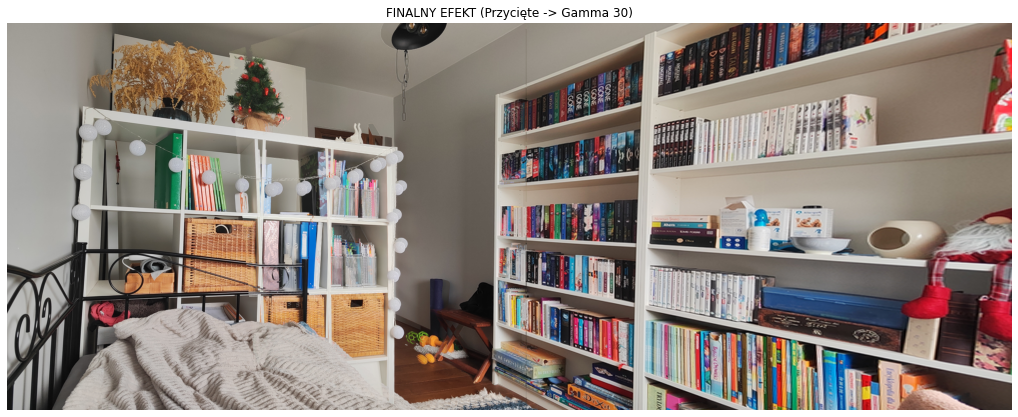

In [ ]:
# blending finalny - gamma 30
# 1. PARAMETRY
GAMMA_BLENDING = 30
JASNOSC = 1.0
KOREKTA_RGB = (1.0, 1.0, 1.0) 

# Pobieramy wymiary z przyciętych już obrazków
nh_crop, nw_crop, _ = arr1.shape

# 2. Korekta kolorów (Neutralna)
arr2[:, :, 0] *= (JASNOSC * KOREKTA_RGB[0])
arr2[:, :, 1] *= (JASNOSC * KOREKTA_RGB[1])
arr2[:, :, 2] *= (JASNOSC * KOREKTA_RGB[2])
arr2 = np.clip(arr2, 0, 1.0)

# 3. Maski i Overlap
mask1 = arr1[:,:,3] > 0
mask2 = arr2[:,:,3] > 0
overlap = mask1 & mask2
final = np.zeros_like(arr1)

if np.any(overlap):
    # Znajdowanie granic nakładania się
    idx = np.where(np.any(overlap, axis=0))[0]
    mn, mx = idx[0], idx[-1]
    
    # Tworzenie gradientu (przejścia)
    grad = np.linspace(0, 1, mx-mn)
    alpha = np.zeros((nh_crop, nw_crop), dtype=np.float32)
    alpha[:, mn:mx] = np.tile(grad, (nh_crop, 1))
    alpha_rgb = np.dstack([alpha]*3)
    
    # Kopiowanie stref bez nakładania
    final[mask1 & ~overlap] = arr1[mask1 & ~overlap]
    final[mask2 & ~overlap] = arr2[mask2 & ~overlap]
    
    # --- MATEMATYKA GAMMA 30 ---
    # Podnosimy do potęgi 30 (to usuwa cienie/winietę)
    p1_pow = np.power(arr1[:,:,:3], GAMMA_BLENDING)
    p2_pow = np.power(arr2[:,:,:3], GAMMA_BLENDING)
    
    # Czyścimy oryginały, żeby zwolnić RAM przed sumowaniem
    del arr1, arr2
    
    w1 = 1.0 - alpha_rgb
    w2 = alpha_rgb
    
    # Mieszamy energię i pierwiastkujemy
    blend = np.power(p1_pow * w1 + p2_pow * w2, 1.0 / GAMMA_BLENDING)
    
    # Wklejamy wynik w strefę overlap
    ov3 = np.dstack([overlap]*3)
    np.copyto(final[:,:,:3], blend, where=ov3)
    final[:,:,3] = (mask1 | mask2).astype(np.float32)
else:
    # Jeśli się nie nakładają (mało prawdopodobne)
    final = arr1 + arr2

# 4. WYŚWIETLANIE WYNIKU
final_panorama = Image.fromarray((final*255).astype(np.uint8))

plt.figure(figsize=(18, 12))
plt.imshow(final_panorama)
plt.title(f"FINALNY EFEKT (Przycięte -> Gamma {GAMMA_BLENDING})")
plt.axis('off')
plt.show()

### 3. Czy istnieją metody automatycznej klasyfikacji punktów zbieżnych na obu fotografiach?

Tak, w nowoczesnej wizji komputerowej rzadko zaznacza się punkty ręcznie. Wykorzystuje się algorytmy detekcji cech (feature detectors) i deskryptory, takie jak:

SIFT (Scale-Invariant Feature Transform): Odporny na skalę i obrót.

SURF lub ORB: Szybsze alternatywy dla SIFT. Algorytm znajduje tysiące potencjalnych punktów na obu zdjęciach, a następnie dopasowuje je (matching). Aby odrzucić błędne dopasowania (outliers), stosuje się algorytm RANSAC (Random Sample Consensus), który iteracyjnie szuka modelu homografii pasującego do największej liczby par punktów.

### 4. Jaki maksymalnie kąt możemy uchwycić korzystając z odpowiedniego rzutu na płaszczyznę? Dlaczego?

Teoretycznie rzut perspektywiczny (rzut na płaszczyznę) jest możliwy dla kątów widzenia (FOV) mniejszych niż 180 stopni.

W praktyce, przy kątach zbliżających się do 180 stopni, zniekształcenia perspektywiczne dążą do nieskończoności (piksele na brzegach są ekstremalnie rozciągane).

Rozsądną granicą dla rzutu płaskiego (rectilinear) jest ok. 100–110 stopni.

Aby uzyskać panoramę 360 stopni, nie stosuje się rzutu na płaszczyznę, lecz rzut cylindryczny lub sferyczny

## 4. podsumowanie wyników oraz wnioski;

W projekcie udało się połączyć dwa obrazy w panoramę, wykorzystując aparat algebry liniowej. Kluczowe było zrozumienie roli macierzy homografii oraz transformacji współrzędnych jednorodnych.

## 5. notatkę zawierającą informację, które z zadań było najtrudniejsze.

Najtrudniejsze zadanie: Największym wyzwaniem było poprawne obliczenie rozmiaru docelowego "płótna" i macierzy translacji (krok z shift_x, shift_y). Bez tego kroku transformowane zdjęcie "uciekało" poza obszar widoczności (ujemne współrzędne) lub było ucinane. Również dopasowanie odpowiedniego sposobu mieszania (blendingu), aby usunąć widoczną linię łączenia, wymagało eksperymentów z parametrem Gamma.